<a href="https://colab.research.google.com/github/secoxx/CS464/blob/main/cs464hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pillow
from google.colab import drive
import pandas as pd
import tensorflow as tf
from zipfile import ZipFile
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/My\ Drive/cs464hw2/afhq_cat.zip -d drive/My\ Drive/cs464hw2

Archive:  drive/My Drive/cs464hw2/afhq_cat.zip
replace drive/My Drive/cs464hw2/flickr_cat_000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

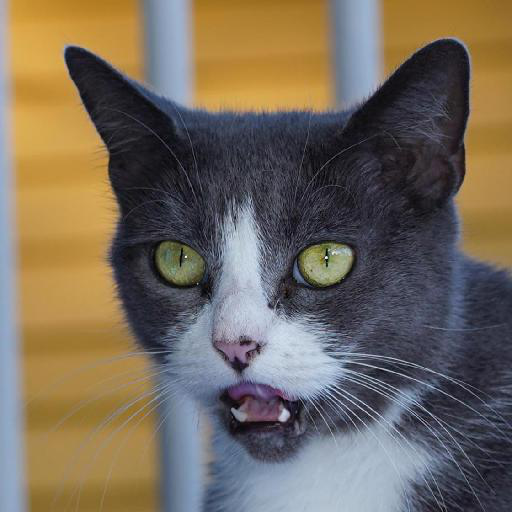

In [ ]:
img = tf.keras.preprocessing.image.load_img('drive/My Drive/cs464hw2/flickr_cat_000003.jpg')
img

In [ ]:
image_directory = 'drive/My Drive/cs464hw2'
resized_images = []
resized_flat = []
photos=[]
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_directory, filename)
        resized_img = Image.open(image_path).resize((64,64),Image.BILINEAR)
        photos.append(resized_img)
        resized_arr = np.array(resized_img)
        resized_images.append(resized_arr)
        resized_arr_flat = resized_arr.flatten().reshape(4096,3)
        resized_flat.append(resized_arr_flat)


In [ ]:
for filename in os.listdir(image_directory):
  if filename=="flickr_cat_000003.jpg":
    image_path = os.path.join(image_directory, "flickr_cat_000003.jpg")
    image = Image.open(image_path)
    second_image = image.resize((64, 64),Image.BILINEAR)
    second_image.save("second_image.jpg")

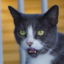

In [ ]:
second_image

In [ ]:
resized_images_arr = np.array(resized_images)
resized_images_arr.shape

(5653, 64, 64, 3)

In [ ]:
resized_flat[0]
X = np.array(resized_flat)
X.shape

(5653, 4096, 3)

In [ ]:
X_0 = X[:,:,0]
X_1 = X[:,:,1]
X_2 = X[:,:,2]

In [ ]:
X_0.shape

(5653, 4096)

In [ ]:
def subtract_mean(x):
  col_avg = np.mean(x, axis=0)
  x = x - col_avg
  return x
subtracted_mean_X_0 = subtract_mean(X_0)
subtracted_mean_X_1 = subtract_mean(X_1)
subtracted_mean_X_2 = subtract_mean(X_2)
subtracted_mean_X_0.shape

(5653, 4096)

In [ ]:
cov_0 = np.cov(subtracted_mean_X_0,rowvar=False)
cov_1 = np.cov(subtracted_mean_X_1,rowvar=False)
cov_2 = np.cov(subtracted_mean_X_2,rowvar=False)
cov_0.shape

(4096, 4096)

In [ ]:
lambda_0,u_0 = np.linalg.eig(cov_0)
lambda_1,u_1 = np.linalg.eig(cov_1)
lambda_2,u_2 = np.linalg.eig(cov_2)

In [ ]:
lambda_0.shape

(4096,)

In [ ]:
sorted_lambda_0 = np.sort(lambda_0)
desc_sorted_lambda_0 = sorted_lambda_0[::-1]
first_10_lambda_0 = desc_sorted_lambda_0[:10]
lambda_0_sorted_indices = np.argsort(lambda_0)[::-1]
u_0 = u_0[:, lambda_0_sorted_indices]

sorted_lambda_1 = np.sort(lambda_1)
desc_sorted_lambda_1 = sorted_lambda_1[::-1]
first_10_lambda_1 = desc_sorted_lambda_1[:10]
lambda_1_sorted_indices = np.argsort(lambda_1)[::-1]
u_1 = u_1[:, lambda_1_sorted_indices]

sorted_lambda_2 = np.sort(lambda_2)
desc_sorted_lambda_2 = sorted_lambda_0[::-1]
first_10_lambda_2 = desc_sorted_lambda_2[:10]
lambda_2_sorted_indices = np.argsort(lambda_2)[::-1]
u_2 = u_2[:, lambda_2_sorted_indices]

# top_10_u_0 = u_0[:, lambda_0_sorted_indices[:10]]
# top_10_u_1 = u_1[:, lambda_1_sorted_indices[:10]]
# top_10_u_2 = u_2[:, lambda_2_sorted_indices[:10]]


In [ ]:
PVE_0 = sum(first_10_lambda_0)/sum(lambda_0)
print(PVE_0)
PVE_1 = sum(first_10_lambda_1)/sum(lambda_1)
print(PVE_1)
PVE_2 = sum(first_10_lambda_2)/sum(lambda_2)
print(PVE_2)

0.6866950290522251
0.6695607576002388
0.6875121939371761


In [ ]:
for i in range(len(first_10_lambda_0)):
  print('Proportion of variance explained by PC',i+1,'for RED is',first_10_lambda_0[i]/sum(lambda_0))
for i in range(len(first_10_lambda_1)):
  print('Proportion of variance explained by PC',i+1,'for GREEN is',first_10_lambda_1[i]/sum(lambda_1))
for i in range(len(first_10_lambda_2)):
  print('Proportion of variance explained by PC',i+1,'for BLUE is',first_10_lambda_2[i]/sum(lambda_2))

Proportion of variance explained by PC 1 for RED is 0.2350556443517378
Proportion of variance explained by PC 2 for RED is 0.15650303278727365
Proportion of variance explained by PC 3 for RED is 0.09004831530313552
Proportion of variance explained by PC 4 for RED is 0.0682970736336529
Proportion of variance explained by PC 5 for RED is 0.03752532455571011
Proportion of variance explained by PC 6 for RED is 0.023946475823578228
Proportion of variance explained by PC 7 for RED is 0.022763487387580512
Proportion of variance explained by PC 8 for RED is 0.02112766242461926
Proportion of variance explained by PC 9 for RED is 0.017935306915412747
Proportion of variance explained by PC 10 for RED is 0.013492705869524356
Proportion of variance explained by PC 1 for GREEN is 0.2087306951194576
Proportion of variance explained by PC 2 for GREEN is 0.15883864125952965
Proportion of variance explained by PC 3 for GREEN is 0.09258536340792485
Proportion of variance explained by PC 4 for GREEN is 0.

In [ ]:
result0 = ", ".join(["{:.3f}".format(first_10_lambda_0[i]/sum(lambda_0)) for i in range(len(first_10_lambda_0))])
result1 = ", ".join(["{:.3f}".format(first_10_lambda_1[i]/sum(lambda_1)) for i in range(len(first_10_lambda_1))])
result2 = ", ".join(["{:.3f}".format(first_10_lambda_2[i]/sum(lambda_2)) for i in range(len(first_10_lambda_2))])
print(result0,'\n',result1,'\n',result2)

0.235, 0.157, 0.090, 0.068, 0.038, 0.024, 0.023, 0.021, 0.018, 0.013 
 0.209, 0.159, 0.093, 0.068, 0.038, 0.024, 0.024, 0.021, 0.019, 0.014 
 0.235, 0.157, 0.090, 0.068, 0.038, 0.024, 0.023, 0.021, 0.018, 0.014


In [ ]:
sum(desc_sorted_lambda_0[:12])/sum(lambda_0)

0.7081483920649667

In [ ]:
sum(desc_sorted_lambda_1[:13])/sum(lambda_1)

0.7012190629627253

In [ ]:
sum(desc_sorted_lambda_2[:12])/sum(lambda_2)

0.7089910863831835

In [ ]:
u_0.shape
print(u_0)

[[ 0.01404392  0.02924881 -0.00452879 ... -0.01188792 -0.00537506
  -0.00573654]
 [ 0.01412398  0.02929839 -0.00449321 ...  0.01456227 -0.0054538
   0.00668942]
 [ 0.01419606  0.02932834 -0.00452349 ... -0.00401721  0.01075038
  -0.00587224]
 ...
 [ 0.01355931 -0.00039019  0.02589248 ... -0.00237679 -0.00925252
   0.01496109]
 [ 0.01337233  0.00064598  0.02573223 ...  0.00152328  0.01086373
  -0.00786582]
 [ 0.01323722  0.0014456   0.02515764 ...  0.0014413  -0.00792884
  -0.00178564]]


In [ ]:
u_0_new = u_0[:,:10].reshape(64,64,10)
u_1_new = u_1[:,:10].reshape(64,64,10)
u_2_new = u_2[:,:10].reshape(64,64,10)

In [ ]:
len(u_0_new[0][0])

10

In [ ]:
def scaler(u):
  normalized_eigenvectors = np.zeros_like(u)

  for i in range(len(u[0][0])):
    eigenvector = u[:,:,i]
    min_val = eigenvector.min()
    max_val = eigenvector.max()
    normalized_eigenvector = (eigenvector - min_val) / (max_val - min_val)
    normalized_eigenvectors[:,:,i] = normalized_eigenvector
  return normalized_eigenvectors

In [ ]:
normalized_u_0 = scaler(u_0_new)
normalized_u_1 = scaler(u_1_new)
normalized_u_2 = scaler(u_2_new)

In [ ]:
normalized_u_0

In [ ]:
stacked = np.stack((normalized_u_0,normalized_u_1,normalized_u_2),axis=-2)
stacked.shape

(64, 64, 3, 10)

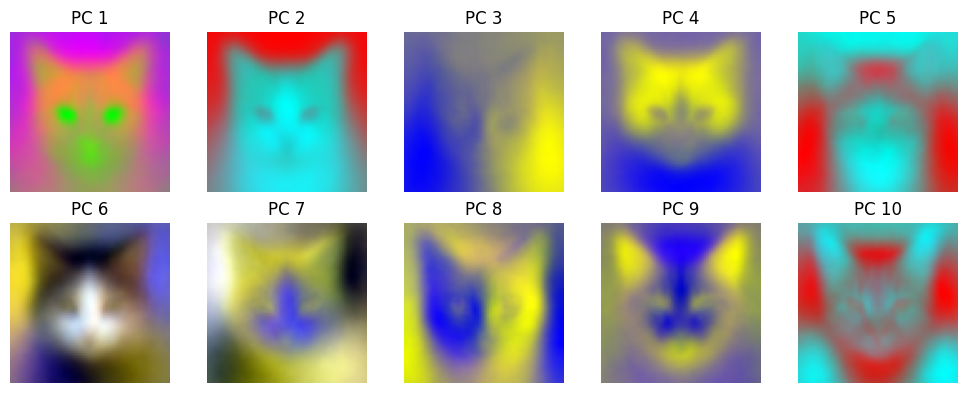

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(stacked[:, :, :, i])
    ax.set_title(f'PC {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
second_image_arr = np.array(second_image)
second_image_arr_flat = second_image_arr.flatten().reshape(4096,3)
second_image_arr_flat.shape

(4096, 3)

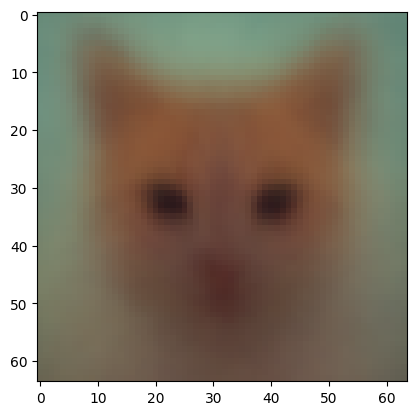

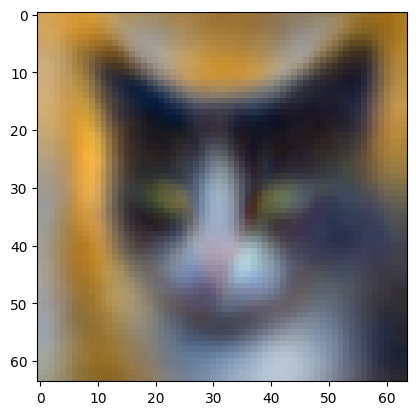

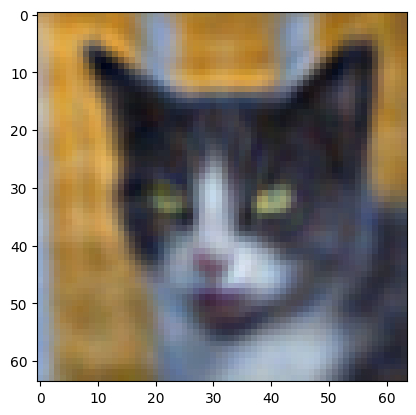

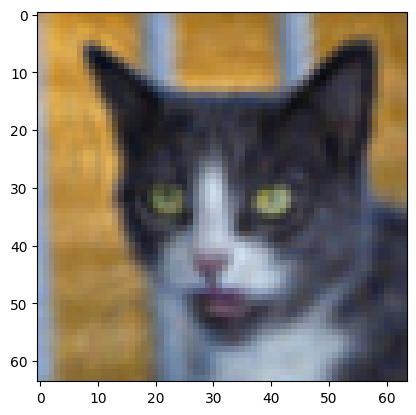

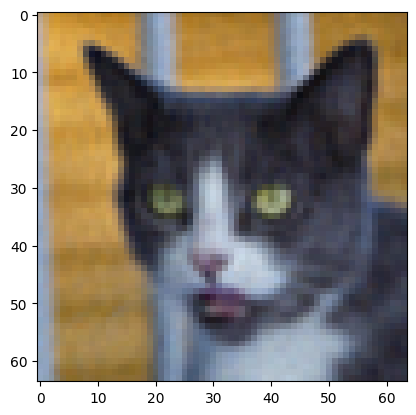

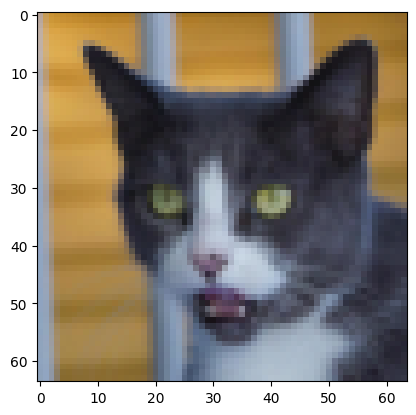

In [ ]:
lst = [1,50,250,500,1000,4096]
def reconstructer(image,k):
  image_0 = image[:,0]
  image_1 = image[:,1]
  image_2 = image[:,2]
  new_u_0 = u_0[:,:k]
  new_u_1 = u_1[:,:k]
  new_u_2 = u_2[:,:k]
  arr0 = np.dot(image_0,new_u_0)
  arr1 = np.dot(image_1,new_u_1)
  arr2 = np.dot(image_2,new_u_2)
  reconstructed0 = np.dot(arr0,new_u_0.transpose())
  reconstructed1 = np.dot(arr1,new_u_1.transpose())
  reconstructed2 = np.dot(arr2,new_u_2.transpose())
  stacked = np.column_stack((reconstructed0,reconstructed1,reconstructed2)).astype("int")
  return stacked

reconstructed_image_list = []
for k in lst:
  reconstructed_image= reconstructer(second_image_arr_flat,k)
  reconstructed_image = reconstructed_image.reshape((64,64,3))
  reconstructed_image_list.append(reconstructed_image)
len(reconstructed_image_list)
for i in reconstructed_image_list:
  plt.imshow(i)
  plt.show()


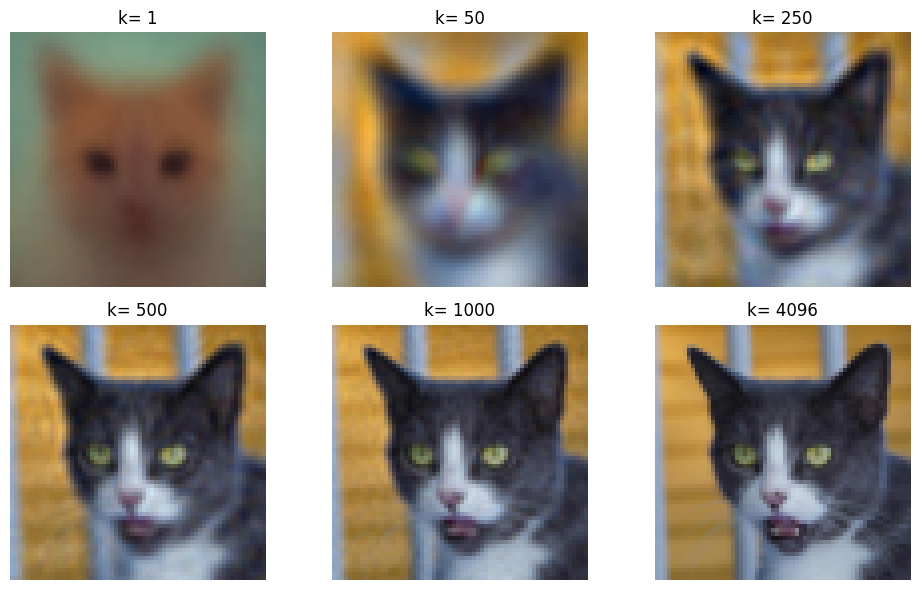

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
  k =lst[i]
  ax.imshow(reconstructed_image_list[i])
  ax.set_title(f'k= {k}')
  ax.axis('off')

plt.tight_layout()
plt.show()